. Separate into positions
.

In [1]:
import sys
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.append('../')

In [3]:
df_draft = pd.read_csv('../data/raw_nfl_draft.csv')

In [4]:
df_draft.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.,NaN
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon,NaN
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,2.5,Florida,NaN
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama,NaN
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa,NaN


In [5]:
df_draft.describe()

,Year,Rnd,Pick,First4AV,Age,To,AP1,PB,St,CarAV,...,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int
count,8435.000000,8211.000000,8435.000000,8435.00000,7190.000000,7053.000000,8435.000000,8435.000000,8435.000000,7053.000000,...,594.000000,594.000000,1646.000000,1646.000000,1646.000000,2171.000000,2171.000000,2171.000000,4111.000000,1616.000000
mean,1999.197629,4.966508,139.141316,9.92709,22.639499,2004.610804,0.073622,0.275874,1.830587,17.276195,...,25.038721,18.915825,202.143378,827.727825,5.801944,105.699678,1243.660525,7.409949,86.745804,9.211943
std,9.180569,2.788304,83.237196,13.13477,0.844544,9.061308,0.465718,1.106443,2.972463,22.390409,...,63.515187,40.940416,453.280726,1914.291647,13.950791,170.804626,2237.914954,15.079805,149.519255,15.989047
min,1985.000000,1.000000,1.000000,-4.00000,20.000000,1985.000000,0.000000,0.000000,0.000000,-4.000000,...,0.000000,0.000000,0.000000,-36.000000,0.000000,0.000000,-19.000000,0.000000,1.000000,0.500000
25%,1991.000000,3.000000,69.000000,0.00000,22.000000,1997.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,3.000000,11.000000,0.000000,4.000000,41.000000,0.000000,4.000000,1.000000
50%,1999.000000,5.000000,137.000000,4.00000,23.000000,2006.000000,0.000000,0.000000,0.000000,8.000000,...,1.000000,1.000000,22.000000,94.000000,0.000000,34.000000,315.000000,1.000000,17.000000,3.500000
75%,2007.000000,7.000000,205.000000,16.00000,23.000000,2013.000000,0.000000,0.000000,3.000000,26.000000,...,12.750000,16.750000,179.750000,655.500000,5.000000,136.500000,1383.500000,8.000000,102.000000,10.000000
max,2015.000000,12.000000,336.000000,88.00000,29.000000,2016.000000,10.000000,14.000000,19.000000,177.000000,...,539.000000,336.000000,4409.000000,18355.000000,164.000000,1549.000000,22895.000000,197.000000,1562.000000,200.000000


In [45]:
profile = pandas_profiling.ProfileReport(df_draft)
profile.to_file(outputfile="Profile_Draf.html")

In [54]:
positions = list(set(df_draft['Position Standard']))
df_positions = {}
info = list()
for pos in positions:
    df_positions[pos] = df_draft[df_draft['Position Standard'] == pos]

In [58]:
total_by_pos = {}
for pos in positions:
    total_by_pos[pos] = len(df_positions[pos])

In [128]:
total_by_pos

{'FB': 77,
 'DE': 731,
 'WR': 1049,
 'TE': 496,
 'LS': 1,
 'QB': 398,
 'K': 78,
 'G': 542,
 'DB': 1569,
 'C': 225,
 'RB': 809,
 'DT': 640,
 'P': 77,
 'T': 619,
 'LB': 1124}

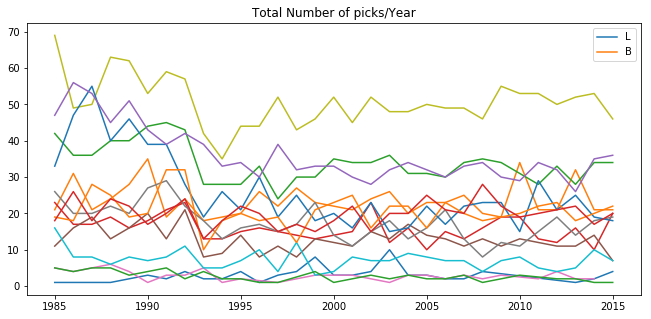

In [127]:
plt.figure(figsize=(11,5))
for pos in positions:
    title = "Total Number of picks/Year"
    plt.plot(df_positions[pos].groupby('Year').count()['Pick'])
    plt.legend(pos)
    plt.title(title)

Text(0.5,1,'Total Number of Quaterback picks/Year')

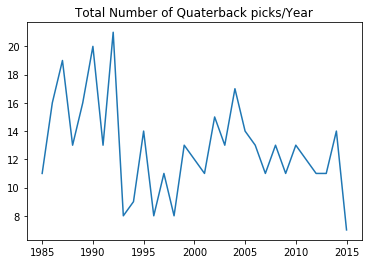

In [113]:
plt.plot(df_positions['QB'].groupby('Year').count()['Pick'])
plt.title("Total Number of Quaterback picks/Year")

Text(0.5,1,'Average Quarterback Pick number/Year')

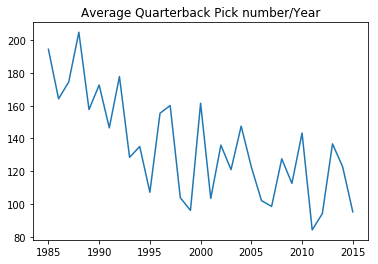

In [114]:
plt.plot(df_positions['QB'].groupby('Year').mean()['Pick'])
plt.title("Average Quarterback Pick number/Year")

Text(0.5,1,'Total Number of Running Backs picks/Year')

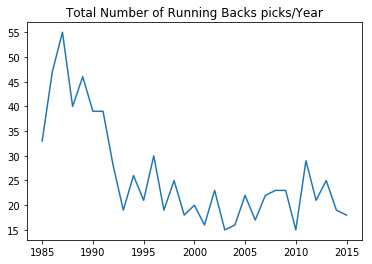

In [115]:
plt.plot(df_positions['RB'].groupby('Year').count()['Pick'])
plt.title("Total Number of Running Backs picks/Year")

Text(0.5,1,'Average Running Back Pick number/Year')

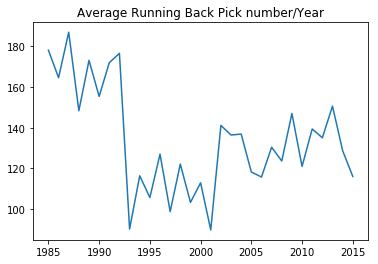

In [116]:
plt.plot(df_positions['RB'].groupby('Year').mean()['Pick'])
plt.title("Average Running Back Pick number/Year")

Text(0.5,1,'Total Number of Wide Receivers picks/Year')

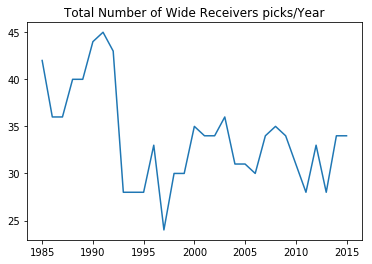

In [117]:
plt.plot(df_positions['WR'].groupby('Year').count()['Pick'])
plt.title("Total Number of Wide Receivers picks/Year")

Text(0.5,1,'Average Wide Receiver Pick number/Year')

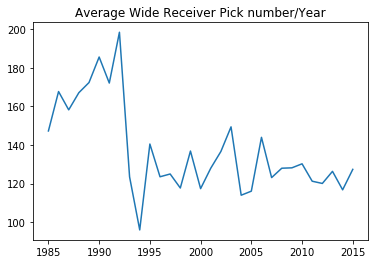

In [102]:
plt.plot(df_positions['WR'].groupby('Year').mean()['Pick'])
plt.title("Average Wide Receiver Pick number/Year")

In [119]:
df_positions['QB'].groupby('Year').mean()

,Rnd,Pick,First4AV,Age,To,AP1,PB,St,CarAV,DrAV,...,Pass_TD,Pass_Int,Rush_Att,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int
Year,,,,,,,,,,,,,,,,,,,,,
1985,7.545455,194.363636,6.272727,22.666667,1996.666667,0.090909,0.545455,1.363636,35.000000,18.800000,...,81.200000,59.800000,272.800000,1397.600000,10.400000,1.500000,-2.000000,0.000000,NaN,NaN
1986,6.500000,164.187500,11.375000,22.846154,1992.000000,0.000000,0.187500,1.625000,18.307692,14.500000,...,45.000000,45.909091,62.307692,151.153846,1.846154,2.000000,-8.000000,0.000000,NaN,NaN
1987,6.736842,174.421053,10.157895,22.500000,1994.500000,0.105263,0.526316,2.473684,32.928571,18.111111,...,68.785714,59.857143,166.928571,699.000000,5.714286,2.000000,4.000000,0.000000,NaN,NaN
1988,7.923077,204.769231,4.538462,22.600000,1998.800000,0.076923,0.230769,1.615385,32.200000,4.666667,...,55.200000,53.800000,119.800000,397.600000,4.200000,1.500000,7.000000,0.000000,NaN,NaN
1989,6.125000,157.625000,7.125000,23.000000,1995.000000,0.000000,0.375000,1.250000,22.250000,24.333333,...,39.375000,40.000000,125.500000,452.500000,5.000000,2.000000,-19.000000,0.000000,NaN,NaN
1990,6.850000,172.600000,6.950000,22.636364,1996.181818,0.000000,0.050000,1.100000,19.545455,9.000000,...,40.363636,31.454545,62.909091,147.818182,1.636364,1.000000,-6.000000,0.000000,NaN,NaN
1991,5.769231,146.461538,8.076923,22.600000,1997.400000,0.230769,0.846154,1.692308,20.600000,2.571429,...,59.700000,45.200000,87.400000,257.800000,1.600000,2.000000,-7.000000,0.000000,NaN,NaN
1992,6.809524,177.761905,6.000000,22.846154,1999.076923,0.000000,0.142857,1.142857,18.692308,6.083333,...,38.076923,33.384615,108.181818,402.090909,3.090909,1.000000,2.500000,0.250000,NaN,NaN
1993,NaN,128.500000,13.750000,22.625000,2003.375000,0.000000,1.250000,5.000000,48.125000,18.166667,...,98.250000,79.375000,201.625000,725.375000,6.125000,2.000000,-8.000000,0.000000,NaN,NaN


In [110]:
df_draft[(df_draft['Position Standard'] == 'WR') & (df_draft['Year'] == 1985)]

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,Unnamed: 32
8108,ToonAl00,1985,1.0,10,NYJ,Al Toon,WR,WR,42,22.0,...,7.0,0.0,517.0,6605.0,31.0,NaN,NaN,Wisconsin,NaN,NaN
8111,BrowEd00,1985,1.0,13,CIN,Eddie Brown,WR,WR,51,22.0,...,164.0,0.0,363.0,6134.0,41.0,NaN,NaN,Miami (FL),NaN,NaN
8114,RiceJe00,1985,1.0,16,SFO,Jerry Rice HOF,WR,WR,69,22.0,...,645.0,10.0,1549.0,22895.0,197.0,NaN,NaN,Miss. Valley St.,NaN,NaN
8121,HestJe00,1985,1.0,23,RAI,Jessie Hester,WR,WR,12,22.0,...,53.0,1.0,373.0,5850.0,29.0,NaN,NaN,Florida St.,NaN,NaN
8129,JohnVa00,1985,2.0,31,DEN,Vance Johnson,WR,WR,36,22.0,...,44.0,0.0,415.0,5695.0,37.0,NaN,NaN,Arizona,NaN,NaN
8140,BurkCh00,1985,2.0,42,BUF,Chris Burkett,WR,WR,20,23.0,...,-6.0,0.0,292.0,4352.0,19.0,NaN,NaN,Jackson St.,NaN,NaN
8144,RobiSt00,1985,2.0,46,NYG,Stacy Robinson,WR,WR,6,23.0,...,NaN,NaN,48.0,749.0,7.0,NaN,NaN,North Dakota St.,NaN,NaN
8148,ScotCh22,1985,2.0,50,RAM,Chuck Scott,WR,WR,1,22.0,...,NaN,NaN,6.0,87.0,0.0,NaN,NaN,Vanderbilt,NaN,NaN
8176,ManeJa20,1985,3.0,78,CHI,James Maness,WR,WR,0,22.0,...,NaN,NaN,1.0,34.0,0.0,NaN,NaN,TCU,NaN,NaN
8177,MoffTi00,1985,3.0,79,RAI,Tim Moffett,WR,WR,3,23.0,...,1.0,0.0,16.0,247.0,1.0,NaN,NaN,Mississippi,NaN,NaN
